## Zadanie nr 1

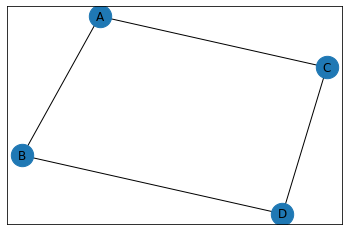

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_edge('A', 'B', weight=4)
G.add_edge('B', 'D', weight=2)
G.add_edge('A', 'C', weight=3)
G.add_edge('C', 'D', weight=4)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)
plt.show()


## Zadanie nr 2

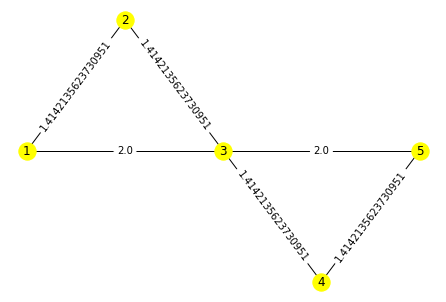

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.Graph()
VV = [1, 2, 3, 4, 5]
WW = [(1, 2), (2, 3), (3, 4), (4, 5), (1, 3), (3, 5)]
Vx = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}
Vy = {1: 0, 2: 1, 3: 0, 4: -1, 5: 0}

g = nx.Graph()
gpos = {}

for v in VV:
    g.add_node(v)
    gpos[v] = [Vx[v], Vy[v]]
for v1 in VV:
    for v2 in VV:
        if (v1, v2) in WW:
            label = str(np.sqrt((Vx[v1] - Vx[v2])**2 + (Vy[v1] - Vy[v2])**2))
            g.add_weighted_edges_from([(v1, v2, label)])
nx.draw(g, gpos, with_labels=True, node_color='yellow')
labels = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, gpos, edge_labels=labels)
plt.show()

## Zadanie nr 3
Napisz program wyświetlający graf pełny o parametrach: liczba wierzchołków zadana parametrycznie (jako
stała w programie), wierzchołki rozmieszczone na okręgu, w równych odstępach, etykiety wierzchołkow są
kolejnymi liczbami naturalnymi.

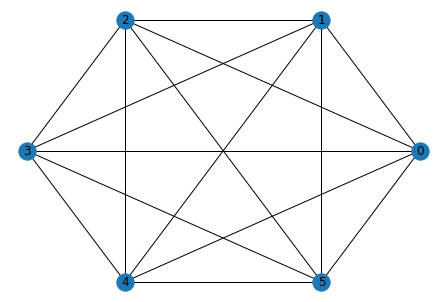

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# zadana liczba wierzchołków
num_of_nodes = 6

G = nx.complete_graph(num_of_nodes)
position = nx.circular_layout(G)

nx.draw(G, pos=position)
nx.draw_networkx_labels(G, pos=position)
plt.show()

Do zrealizowanie podpunktu używam funkcji wbudowanych z pakietu networkx.
https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.circular_layout.html
https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.complete_graph.html

## Zadanie 4
Napisz program losujący graf o parametrycznie zadanej liczbie wierzchołków. Wierzchołki są rozmieszczone
w losowych punktach (całego obszaru grafu) ale tak, żeby na siebie nie zachodziły. Wierzchołki dodawaj
do grafu pojedynczo, jeśli wylosowany wierzchołek zachodzi na inny, to wylosuj nową pozycję dodawanego
(powtarzaj tyle razy, aż nie będzie kolizji). Przerwij działanie programu, jeśli nie udało się wygenerować
grafu po 100 nieudanych próbach dodania wierzchołka.

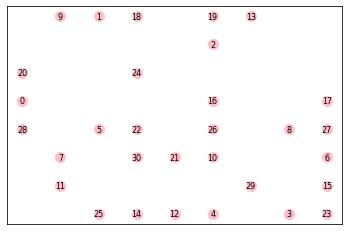

In [7]:
import networkx as nx
from random import randint
import matplotlib.pyplot as plt


num_of_nodes = 30  # zadana liczba wierzchołków
nodes = list()
G = nx.Graph()
gpos = {}


# petla dodająca wierzchołki do grafu
for n in range(num_of_nodes):
    nodes.append(n)
    G.add_node(n)

# pętla generaująca 3 krawędzie dla każdego z wierzchołków
# czynność opcjonalna nie było jej w poleceniu
for x in range(num_of_nodes):
    for n in range(3):
        y = x
        while x == y:
            y = randint(0, num_of_nodes)
        G.add_edge(x, y)

# pętla losująca pozycje
for node in range(num_of_nodes+1):
    for n in range(100):
        position = [randint(0, 8), randint(1, 8)]
        if position not in gpos.values():
            gpos[node] = position
            break
        if n == 99:
            print('Nie udało sięd dopacować wierzchołka.')
            exit()


nx.draw_networkx_nodes(G, gpos, node_size=100, node_color='pink')
nx.draw_networkx_labels(G, gpos, font_size=8)
#nx.draw_networkx_edges(G, gpos)
plt.show()

In [1]:
# Zachodzenie na siebie wierzchołków interpretuje poprzez te same wspórzędne w układzie 8x8. #